<center><strong><h1>UAS</h1></strong></center>
<p style="margin-left:31.5%;font-size:20px;font-weight:600;color:blue;">KAPITA SELEKTA KOMPUTASI</p>
<p style="margin-left:30%;font-size:20px;font-weight:600;">Maftuh Mashuri (11160940000076)</p>

# Import Modul Python

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.style.use('bmh'); sns.set()

## Deskripsi Data
### Data yang saya gunakan adalah data kecelakan di United States pada bulan Maret 2019 yang berisi 69.381 catatan kecelakan.
### Data ini sudah saya filter dari dataset https://www.kaggle.com/sobhanmoosavi/us-accidents. Dimana dataset tersebut berisi data kecelekaan sebanyak 2.25 juta catatan dari tahun 2016 sampai 2019.
### Data ini berisi 49 variabel yang nantinya akan saya seleksi lagi menjadi beberapa variabel yang berguna.

1. ID: Pengidentifikasi unik dari catatan kecelakaan.
2. Source: Menunjukkan sumber laporan kecelakaan (yaitu API yang melaporkan kecelakaan itu).
3. TMC: Kecelakaan lalu lintas mungkin memiliki kode Traffic Message Channel (TMC) yang memberikan deskripsi lebih rinci tentang peristiwa tersebut.
4. Severity: Menunjukkan tingkat keparahan kecelakaan, angka antara 1 dan 4, di mana 1 menunjukkan dampak paling kecil pada lalu lintas (yaitu, keterlambatan singkat sebagai akibat kecelakaan) dan 4 menunjukkan dampak signifikan pada lalu lintas (yaitu, penundaan lama) .
5. Start_Time: Menunjukkan waktu mulai dari kecelakaan di zona waktu lokal.
6. End_Time: Menunjukkan waktu akhir dari kecelakaan di zona waktu lokal.
7. Start_Lat: Menunjukkan lintang dalam koordinat GPS dari titik awal.
8. Start_Lng: Menunjukkan garis bujur dalam koordinat GPS dari titik awal.
9. End_Lat: Menunjukkan lintang dalam koordinat GPS titik akhir.
10. End_Lng: Menunjukkan garis bujur dalam koordinat GPS titik akhir.
11. Distance(mi): Panjangnya jalan dipengaruhi oleh kecelakaan.
12. Description: Menunjukkan deskripsi bahasa alami dari kecelakaan.
13. Number: Menunjukkan nomor jalan di bidang alamat.
14. Street: Menampilkan nama jalan di bidang alamat.
15. Side: Menunjukkan sisi relatif jalan (Kanan / Kiri) di bidang alamat.
16. City: Menunjukkan kota di bidang alamat.
17. County: Menampilkan daerah dalam bidang alamat.
18. State: Menunjukkan negara bagian di bidang alamat.
19. Zipcode: Menunjukkan kode pos di bidang alamat.
20. Country: Menunjukkan negara di bidang alamat.
21. Timezone: Menampilkan zona waktu berdasarkan lokasi kecelakaan (timur, tengah, dll.).
22. Airport_Code: Menunjukkan stasiun cuaca berbasis bandara yang paling dekat dengan lokasi kecelakaan.
23. Weather_Times: Menunjukkan cap waktu dari catatan pengamatan cuaca (dalam waktu lokal).
24. Temperature (F): Menunjukkan suhu (dalam Fahrenheit).
25. Wind_Chill (P): Menunjukkan angin dingin (di Fahrenheit).
26. Humidity(%): Menunjukkan kelembaban (dalam persentase).
27. Pressure(in): Menunjukkan tekanan udara (dalam inci).
28. Visibility(mi): Menunjukkan jarak pandang (dalam mil).
29. Wind_Direction: Menunjukkan arah angin.
30. Wind_Speed(mph): Menunjukkan kecepatan angin (dalam mil per jam).
31. Precipitation(in): Menunjukkan jumlah curah hujan dalam inci, jika ada.
32. Weather_Condition: Menunjukkan kondisi cuaca (hujan, salju, badai, kabut, dll)
33. Amenity: Sebuah penjelasan POI yang menunjukkan adanya kemudahan evakuasi di lokasi terdekat.
34. Bump: Anotasi POI yang menunjukkan adanya polisi tidur di lokasi terdekat.
35. Crossing: Sebuah penjelasan POI yang menunjukkan adanya perempatan di lokasi terdekat.
36. Give_Way: Penjelasan POI yang menunjukkan keberadaan give_way di lokasi terdekat.
37. Junction: Sebuah penjelasan POI yang menunjukkan adanya persimpangan di lokasi terdekat.
38. No_Exit: Anotasi POI yang menunjukkan keberadaan no exit di lokasi terdekat.
39. Railway: Penjelasan POI yang menunjukkan keberadaan jalur kereta api di lokasi terdekat.
40. Roundabout: Sebuah penjelasan POI yang menunjukkan keberadaan bundaran di lokasi terdekat.
41. Station: Penjelasan POI yang menunjukkan keberadaan stasiun di lokasi terdekat.
42. Stop: Sebuah penjelasan POI yang menunjukkan adanya pemberhentian di lokasi terdekat.
43. Traffic_Calming: Anotasi POI yang menunjukkan keberadaan traffic calming di lokasi terdekat.
44. Traffic_Signal: Anotasi POI yang menunjukkan keberadaan lampu merah di lokasi terdekat.
45. Turning_Loop: Anotasi POI yang menunjukkan keberadaan turning loop di lokasi terdekat.
46. Sunrise_Sunset: Menunjukkan periode hari (mis. Siang atau malam) berdasarkan matahari terbit / terbenam.
47. Civil_Twilight: Menunjukkan periode hari (mis. Siang atau malam) berdasarkan pada twilight sipil.
48. Nautical_Twilight: Menunjukkan periode hari (mis. Siang atau malam) berdasarkan pada senja bahari.
49. Astronomical_Twilight: Menunjukkan periode hari (mis. Siang atau malam) berdasarkan pada senja astronomi.

# Hipotesis Awal
- Tingkat keparahan kecelakaan cenderung memiliki hubungan dengan:
    * angin dingin,
    * kelembaban,
    * tekanan udara,
    * jarak pandangan,
    * arah angin,
    * kecepatan angin,
    * curah hujan,
    * kondisi cuaca
- Tingkat keparahan kecelakaan cenderung memiliki hubungan infrastukur jalan seperti:
    * polisi tidur
    * perempatan
    * persimpangan
    * bundaran
    * trafic calming
    * lampu merah
- Tingkat keparahan kecelakaan cenderung memiliki hubungan dengan waktu (siang atau malam)

In [6]:
data = pd.read_csv('US_Accidents_march2019.csv')

In [7]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
data.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-512230,MapQuest,201.0,3,2019-03-03 09:53:41,2019-03-03 10:22:21,42.338089,-79.586700,NaN,NaN,0.0,Accident on I-90 Westbound after Exit 60 NY-39...,NaN,I-90 W,R,Westfield,Chautauqua,NY,14787,US,US/Eastern,KDKK,2019-03-03 09:53:00,26.1,21.9,66.0,30.19,10.0,WSW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,1,A-512231,MapQuest,201.0,3,2019-03-03 15:25:49,2019-03-03 15:55:22,42.743877,-78.845070,NaN,NaN,0.0,Accident on I-90 Westbound at Exit 57 NY-75 Ca...,NaN,I-90 W,R,Hamburg,Erie,NY,14075,US,US/Eastern,KBUF,2019-03-03 15:54:00,28.0,21.7,61.0,30.03,10.0,WSW,5.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,2,A-512232,MapQuest,201.0,3,2019-03-03 17:36:46,2019-03-03 18:06:29,43.004314,-78.946648,NaN,NaN,0.0,Accident on I-190 Northbound at Exits 18 18A 1...,NaN,I-190 N,R,Grand Island,Erie,NY,14072,US,US/Eastern,KIAG,2019-03-03 17:53:00,25.0,16.3,75.0,30.04,2.5,SSW,8.1,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,3,A-512233,MapQuest,201.0,3,2019-03-03 17:48:42,2019-03-03 18:18:20,43.074436,-78.990921,NaN,NaN,0.0,Accident on I-190 Southbound at Exits 21 21A N...,NaN,I-190 S,R,Niagara Falls,Niagara,NY,14304,US,US/Eastern,KIAG,2019-03-03 17:53:00,25.0,16.3,75.0,30.04,2.5,SSW,8.1,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,4,A-512234,MapQuest,247.0,2,2019-03-03 17:54:31,2019-03-03 18:24:07,41.946899,-78.672333,NaN,NaN,0.0,Delays due to accident on PA-346 Washington St...,451.0,W Washington St,R,Bradford,McKean,PA,16701-2860,US,US/Eastern,KBFD,2019-03-03 17:53:00,24.1,17.0,88.0,29.95,0.5,NNW,5.8,0.02,Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
# Ukuran Data
jumlah_baris, jumlah_kolom = data.shape
print('baris = ', jumlah_baris, ', Kolom = ', jumlah_kolom)

data.info()

baris =  69381 , Kolom =  50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69381 entries, 0 to 69380
Data columns (total 50 columns):
Unnamed: 0               69381 non-null int64
ID                       69381 non-null object
Source                   69381 non-null object
TMC                      54564 non-null float64
Severity                 69381 non-null int64
Start_Time               69381 non-null object
End_Time                 69381 non-null object
Start_Lat                69381 non-null float64
Start_Lng                69381 non-null float64
End_Lat                  14817 non-null float64
End_Lng                  14817 non-null float64
Distance(mi)             69381 non-null float64
Description              69380 non-null object
Number                   26195 non-null float64
Street                   69381 non-null object
Side                     69381 non-null object
City                     69380 non-null object
County                   69381 non-null object
State      

### Mengubah kode negara bagian menjadi namanya

In [9]:
State_dic = {'NY' : 'New York', 'PA' : 'Pennsylvania', 'RI' : 'Rhode Island', 'NH' : 'New Hampshire', 'MI' : 'Michigan', 'CT' : 'Connecticut', 'NJ' : 'New Jersey', 'MD' : 'Maryland', 'VA' : 'Virginia', 'DC' : 'District of Columbia', 'IN' : 'Indiana', 'KY' : 'Kentucky', 'OH' : 'Ohio', 'TN' : 'Tennessee', 'NC' : 'North Carolina', 'FL' : 'Florida', 'GA' : 'Georgia', 'SC' : 'South Carolina', 'AL' : 'Alabama', 'MO' : 'Missouri', 'MN' : 'Minnesota', 'KS' : 'Kansas', 'IL' : 'Illinois', 'IA' : 'Iowa', 'WI' : 'Wisconsin', 'TX' : 'Texas', 'OK' : 'Oklahoma', 'LA' : 'Louisiana', 'CO' : 'Colorado', 'UT' : 'Utah', 'AZ' : 'Arizona', 'NM' : 'New Mexico', 'OR' : 'Oregon', 'WA' : 'Washington', 'NV' : 'Nevada', 'CA' : 'California', 'MA' : 'Massachusetts', 'VT' : 'Vermont', 'DE' : 'Delaware', 'NE' : 'Nebraska', 'MS' : 'Mississippi', 'AR' : 'Arkansas', 'MT' : 'Montana', 'WV' : 'West Virginia', 'ME' : 'Maine', 'WY' : 'Wyoming', 'ID' : 'Idaho', 'ND' : 'North Dakota', 'SD' : 'South Dakota'}

In [10]:
for key, value in State_dic.items():
    data['State'][data[data['State'] == key].index] = value

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Feature Selection
### Drop kolom-kolom yang tidak berguna/berpengaruh


In [11]:
column_drop = ['Unnamed: 0', "ID", "Source", "TMC", 
               "Start_Lat", "Start_Lng", "End_Lat", "End_Lng",
               "Description", "Number", "Zipcode", "Country",
               "Timezone", "Airport_Code", "Weather_Timestamp", 
               'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
data.drop(column_drop, axis=1, inplace=True)
data.dtypes

Severity               int64
Start_Time            object
End_Time              object
Distance(mi)         float64
Street                object
Side                  object
City                  object
County                object
State                 object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
dtype: object

In [12]:
data.head()

,Severity,Start_Time,End_Time,Distance(mi),Street,Side,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,3,2019-03-03 09:53:41,2019-03-03 10:22:21,0.0,I-90 W,R,Westfield,Chautauqua,New York,26.1,21.9,66.0,30.19,10.0,WSW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3,2019-03-03 15:25:49,2019-03-03 15:55:22,0.0,I-90 W,R,Hamburg,Erie,New York,28.0,21.7,61.0,30.03,10.0,WSW,5.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,2019-03-03 17:36:46,2019-03-03 18:06:29,0.0,I-190 N,R,Grand Island,Erie,New York,25.0,16.3,75.0,30.04,2.5,SSW,8.1,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,2019-03-03 17:48:42,2019-03-03 18:18:20,0.0,I-190 S,R,Niagara Falls,Niagara,New York,25.0,16.3,75.0,30.04,2.5,SSW,8.1,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2,2019-03-03 17:54:31,2019-03-03 18:24:07,0.0,W Washington St,R,Bradford,McKean,Pennsylvania,24.1,17.0,88.0,29.95,0.5,NNW,5.8,0.02,Snow,False,False,False,False,False,False,False,False,False,False,False,False,False


### Mengubah tipe data

In [13]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])
data[['Severity', 'Side']] = data[['Severity', 'Side']].astype('category')
data.dtypes

Severity                   category
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Distance(mi)                float64
Street                       object
Side                       category
City                         object
County                       object
State                        object
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Direction               object
Wind_Speed(mph)             float64
Precipitation(in)           float64
Weather_Condition            object
Amenity                        bool
Bump                           bool
Crossing                       bool
Give_Way                       bool
Junction                       bool
No_Exit                        bool
Railway                        bool
Roundabout                     bool
Station                        bool
Stop                        

In [14]:
to_category = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
               'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
               'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

## Mengubah nilai False menjadi 0 dan nilai true menjadi 1 pada variable cuaca
## kemudian mengubahnya menjadi data kategorik

for column in to_category:
    data[column][data[data[column] == False].index] = 0 
    data[column][data[data[column] == True].index] = 1

data[to_category] = data[to_category].astype('category')
data.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Severity                   category
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Distance(mi)                float64
Street                       object
Side                       category
City                         object
County                       object
State                        object
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Direction               object
Wind_Speed(mph)             float64
Precipitation(in)           float64
Weather_Condition            object
Amenity                    category
Bump                       category
Crossing                   category
Give_Way                   category
Junction                   category
No_Exit                    category
Railway                    category
Roundabout                 category
Station                    category
Stop                       c

In [15]:
data.head()

,Severity,Start_Time,End_Time,Distance(mi),Street,Side,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,3,2019-03-03 09:53:41,2019-03-03 10:22:21,0.0,I-90 W,R,Westfield,Chautauqua,New York,26.1,21.9,66.0,30.19,10.0,WSW,3.5,NaN,Mostly Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,2019-03-03 15:25:49,2019-03-03 15:55:22,0.0,I-90 W,R,Hamburg,Erie,New York,28.0,21.7,61.0,30.03,10.0,WSW,5.8,NaN,Overcast,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2019-03-03 17:36:46,2019-03-03 18:06:29,0.0,I-190 N,R,Grand Island,Erie,New York,25.0,16.3,75.0,30.04,2.5,SSW,8.1,0.00,Light Snow,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2019-03-03 17:48:42,2019-03-03 18:18:20,0.0,I-190 S,R,Niagara Falls,Niagara,New York,25.0,16.3,75.0,30.04,2.5,SSW,8.1,0.00,Light Snow,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2019-03-03 17:54:31,2019-03-03 18:24:07,0.0,W Washington St,R,Bradford,McKean,Pennsylvania,24.1,17.0,88.0,29.95,0.5,NNW,5.8,0.02,Snow,0,0,0,0,0,0,0,0,0,0,0,0,0


## Gambaran umum data (statistika deskriptif)

In [16]:
data.describe(include='all')

,Severity,Start_Time,End_Time,Distance(mi),Street,Side,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
count,69381.0,69381,69381,69381.000000,69381,69381,69380,69381,69381,67578.000000,21881.000000,67519.000000,67744.000000,67307.000000,67966,56111.000000,8243.000000,67280,69381.0,69381.0,69381.0,69381.0,69381.0,69381.0,69381.0,69381.0,69381.0,69381.0,69381.0,69381.0,69381.0
unique,4.0,64751,64895,NaN,19838,2,4732,1021,49,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,38,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
top,2.0,2019-03-06 07:09:02,2019-03-29 09:46:03,NaN,I-5 N,R,Charlotte,Los Angeles,California,NaN,NaN,NaN,NaN,NaN,Calm,NaN,NaN,Clear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,47051.0,19,13,NaN,807,55966,1929,4030,11648,NaN,NaN,NaN,NaN,NaN,10882,NaN,NaN,24233,68607.0,69376.0,65588.0,69241.0,64616.0,69304.0,68807.0,69373.0,68410.0,68644.0,69365.0,59349.0,69381.0
first,NaN,2019-03-01 00:08:44,2019-03-01 00:49:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-03-31 23:57:31,2019-04-13 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.373003,NaN,NaN,NaN,NaN,NaN,49.572575,27.281239,62.393474,30.113463,9.164325,NaN,9.280995,0.028617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.090839,NaN,NaN,NaN,NaN,NaN,16.102894,12.854571,22.870445,0.261797,2.696931,NaN,4.822908,0.060155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,-20.200000,-35.700000,4.000000,0.000000,0.000000,NaN,1.200000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,39.000000,21.700000,44.000000,30.000000,10.000000,NaN,5.800000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Jika dilihat dari tabel diatas, tempat yang paling sering terjadi kecelakan yaitu di jalan I-5 N Kota Charlotte Los Angeles California. Dan tingkat keparahan akibat dampak kecelakaan adalah pada tingkat 2 yaitu sebanyak 47051 catatan

### Cek Missing Value

In [17]:
data.isnull().sum()

Severity                 0
Start_Time               0
End_Time                 0
Distance(mi)             0
Street                   0
Side                     0
City                     1
County                   0
State                    0
Temperature(F)        1803
Wind_Chill(F)        47500
Humidity(%)           1862
Pressure(in)          1637
Visibility(mi)        2074
Wind_Direction        1415
Wind_Speed(mph)      13270
Precipitation(in)    61138
Weather_Condition     2101
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
dtype: int64

Dari data diatas untuk semua variabel cuaca(Temperature, Wind_Chill, dll) terdapat missing value. Namun variabel yang memiliki missing value >= 50% adalah Wind_Chill dan Precipitation, maka untuk kedua variabel ini lebih baik tidak digunakan dan variabel yang <= 50% akan dihilangkan perbarisnya atau dimanipulasi

In [18]:
# menghapus variabel value yang memiliki missing value lebih dari 50%
for column in data:
    if data[column].isnull().sum() > 0.5 * jumlah_baris:
        data.drop(column, axis=1, inplace=True)

In [19]:
data['City'] = data['City'].fillna('')

In [20]:
data.isnull().sum()

Severity                 0
Start_Time               0
End_Time                 0
Distance(mi)             0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Temperature(F)        1803
Humidity(%)           1862
Pressure(in)          1637
Visibility(mi)        2074
Wind_Direction        1415
Wind_Speed(mph)      13270
Weather_Condition     2101
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
dtype: int64

In [21]:
index_null_city = data[data['City'] == ''].index
street_name_in_null_city = data['Street'][index_null_city].values[0]
index_street_in_another_city = data[data['Street'] == street_name_in_null_city].index[0]
city_name_in_same_street = data['City'][index_street_in_another_city]
data['City'][index_null_city] = city_name_in_same_street

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Untuk mengatasi missing value yang di bawah 50% maka saya akan menghapus semua baris yang mengandung missing value. namun tindakan ini akan menghapus baris pada variabel2 lain. maka saya akan membagi datanya menjadi 3 bagian

### Membagi data menjadi 3 bagian berdasarkan:
    - lokasi (jarak dampak kecelakaan, nama jalan, kota, negara bagian)
    - cuaca (temperatur, kelembaban, dll)
    - infrastruktur jalan (kemudahan akses, polisi tidur, dll)

In [22]:
data_lokasi = data[['Severity', 'Distance(mi)', 'Street', 'City', 'County', 'State']]
data_cuaca = data[['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                          'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition']]
data_infrastruktur = data[['Severity', 'Street', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                                  'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                                  'Traffic_Signal', 'Turning_Loop']]

### Data lokasi
#### Melihat data lokasi

In [23]:
data_lokasi.sample(5)

,Severity,Distance(mi),Street,City,County,State
36499,2,0.00,Guadalupe St,Austin,Travis,Texas
26134,2,0.00,Minnesota Ave SE,Washington,District of Columbia,District of Columbia
27190,3,0.11,S Waldran Blvd,Memphis,Shelby,Tennessee
25836,2,0.00,Albany St,Boston,Suffolk,Massachusetts
41099,2,0.00,Culver Rd,Rochester,Monroe,New York


#### Gambaran umum data lokasi

In [24]:
data_lokasi.describe(include='all')

,Severity,Distance(mi),Street,City,County,State
count,69381.0,69381.000000,69381,69381,69381,69381
unique,4.0,NaN,19838,4732,1021,49
top,2.0,NaN,I-5 N,Charlotte,Los Angeles,California
freq,47051.0,NaN,807,1929,4030,11648
mean,NaN,0.373003,NaN,NaN,NaN,NaN
std,NaN,2.090839,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN
75%,NaN,0.030000,NaN,NaN,NaN,NaN


Dilihat dari tabel diatas tempat yang paling sering terjadi kecelakan adalah di jalan I-5 N di daerah Los Angeles 

#### Melihat missing value

In [25]:
data_lokasi.isnull().sum()

Severity        0
Distance(mi)    0
Street          0
City            0
County          0
State           0
dtype: int64

Dilihat dari data diatas terdapat 1 missing value di variabel City(kota).
Karena yang terdapat missing value hanya satu data, menghilangkannya tidak akan berpengaruh signifikan

In [26]:
data_lokasi = data_lokasi.dropna()

In [27]:
data_lokasi.isnull().sum()

Severity        0
Distance(mi)    0
Street          0
City            0
County          0
State           0
dtype: int64

### Data cuaca
#### Melihat data cuaca

In [28]:
data_cuaca.sample(5)

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition
7777,3,54.0,90.0,29.96,8.0,East,6.9,Light Rain
27486,2,37.0,79.0,30.04,10.0,SSW,3.5,Scattered Clouds
12760,3,28.9,75.0,30.32,7.0,Calm,NaN,Clear
9108,3,19.0,52.0,30.29,10.0,SSE,5.8,Mostly Cloudy
12127,3,33.1,92.0,29.61,0.5,WSW,12.7,Snow


#### Melihat missing value

In [29]:
data_cuaca.isnull().sum()

Severity                 0
Temperature(F)        1803
Humidity(%)           1862
Pressure(in)          1637
Visibility(mi)        2074
Wind_Direction        1415
Wind_Speed(mph)      13270
Weather_Condition     2101
dtype: int64

#### Mengatasi missing value
Karena data cuaca adalah data Time Series (artinya data yang bergantung pada waktu) dan dataset ini hanya menggunakan satu waktu saja yaitu bulan maret 2019, maka tidak bisa kita memanipulasinya dengan statistika deskriptif(mean, modus dll) ataupun dengan metode seasonal adjusment + interpolation.
Tindakan yang paling memungkinkan adalah menghapus baris yang mengandung missing value

In [30]:
data_cuaca = data_cuaca.dropna()

In [31]:
print(data_cuaca.isnull().sum())
print(data_cuaca.info())

Severity             0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 55596 entries, 0 to 69380
Data columns (total 8 columns):
Severity             55596 non-null category
Temperature(F)       55596 non-null float64
Humidity(%)          55596 non-null float64
Pressure(in)         55596 non-null float64
Visibility(mi)       55596 non-null float64
Wind_Direction       55596 non-null object
Wind_Speed(mph)      55596 non-null float64
Weather_Condition    55596 non-null object
dtypes: category(1), float64(5), object(2)
memory usage: 3.4+ MB
None


In [32]:
data_cuaca.describe(include='all')

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition
count,55596.0,55596.000000,55596.000000,55596.000000,55596.000000,55596,55596.000000,55596
unique,4.0,NaN,NaN,NaN,NaN,17,NaN,38
top,2.0,NaN,NaN,NaN,NaN,South,NaN,Clear
freq,37595.0,NaN,NaN,NaN,NaN,5203,NaN,18643
mean,NaN,50.486621,60.578207,30.103870,9.204659,NaN,9.266050,NaN
std,NaN,16.083147,22.668236,0.243835,2.701135,NaN,4.800763,NaN
min,NaN,-16.200000,4.000000,0.000000,0.000000,NaN,1.200000,NaN
25%,NaN,39.900000,43.000000,29.990000,10.000000,NaN,5.800000,NaN
50%,NaN,52.000000,61.000000,30.110000,10.000000,NaN,8.100000,NaN
75%,NaN,62.100000,80.000000,30.250000,10.000000,NaN,11.500000,NaN


In [33]:
print('Setelah baris yang memiliki missing value dibuang, sisa barisnya yaitu', len(data_cuaca['Severity']), 'catatan')

Setelah baris yang memiliki missing value dibuang, sisa barisnya yaitu 55596 catatan


In [34]:
data_cuaca['Pressure(in)'][data_cuaca[data_cuaca['Pressure(in)'] == 0].index] = data_cuaca['Pressure(in)'][data_cuaca[data_cuaca['Pressure(in)'] == 0].index + 1]

## Visualisasi data
### Melihat data tingkat keparahan akibat kecelakaan

In [35]:
Severity = data['Severity'].value_counts().sort_index()
Severity_dic = Severity.to_dict()
Severity_dic

{1: 15, 2: 47051, 3: 19823, 4: 2492}

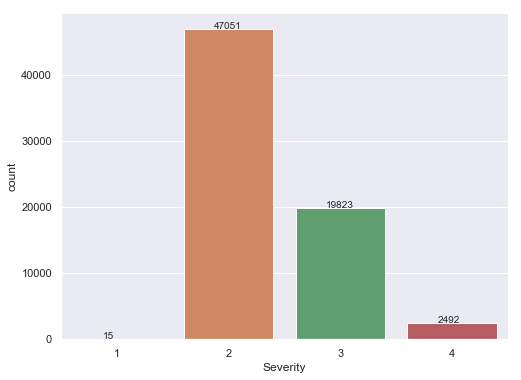

In [36]:
plt.figure(figsize=(8, 6))
col = 'Severity'
ax = sns.countplot(x=col, data=data)
for p, label in zip(ax.patches, Severity.values):
    ax.annotate(label, (p.get_x()+0.27, p.get_height()+0.15))

#### Berdasarkan grafik di atas bahwa tingkat keparahan akibat dampak kecelakaan adalah tingkat ke 2 yaitu sebanyak 47051 catatan dan yang paling sedikit adalah tingkat satu yaitu sebanyak 15 catatan
### Melihat data jumlah kecelakaan berdasarakan tanggal

In [37]:
data['Date'] = data['Start_Time'].dt.day

In [38]:
data.groupby(["Severity", "Date"]).size().unstack()

Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Severity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,1.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN
2,2161.0,412.0,304.0,2104.0,2234.0,2224.0,2166.0,2115.0,482.0,458.0,1740.0,2061.0,2024.0,1788.0,1748.0,435.0,322.0,1845.0,2029.0,2254.0,2116.0,2102.0,536.0,438.0,1870.0,2064.0,2149.0,2034.0,1985.0,508.0,343.0
3,992.0,351.0,489.0,681.0,812.0,854.0,780.0,865.0,477.0,435.0,603.0,637.0,723.0,715.0,793.0,425.0,401.0,638.0,671.0,750.0,746.0,762.0,479.0,393.0,675.0,673.0,680.0,715.0,720.0,508.0,380.0
4,91.0,52.0,115.0,88.0,95.0,81.0,68.0,86.0,79.0,62.0,108.0,76.0,93.0,83.0,103.0,63.0,64.0,98.0,105.0,84.0,64.0,80.0,54.0,53.0,78.0,93.0,94.0,66.0,89.0,63.0,64.0


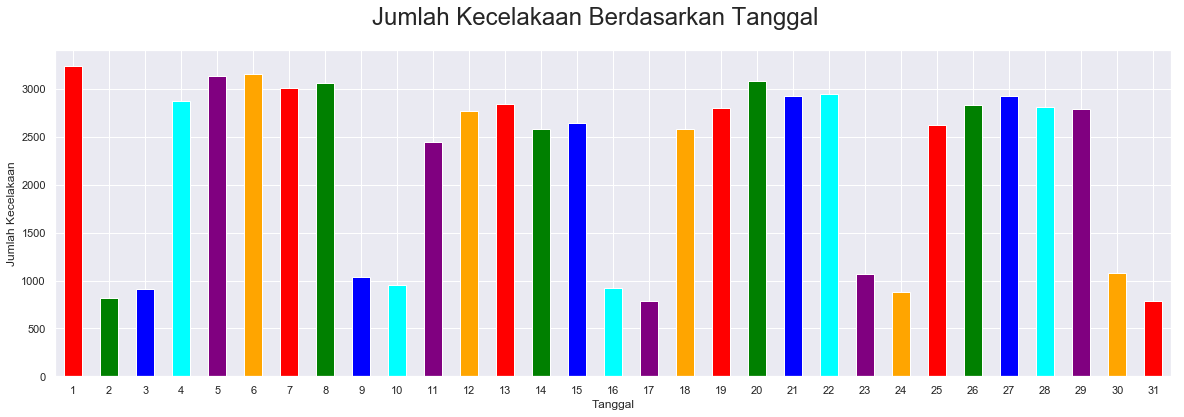

In [39]:
color_for_matplotlib = ['red', 'green', 'blue', 'cyan', 'purple', 'orange']
plt.figure(figsize=(20,6))
Date = data['Date'].value_counts().sort_index()
Date.plot(kind='bar', color=color_for_matplotlib)
plt.suptitle('Jumlah Kecelakaan Berdasarkan Tanggal', fontsize=24)
plt.ylabel('Jumlah Kecelakaan')
plt.xlabel('Tanggal')
plt.xticks(rotation=0)
plt.show()

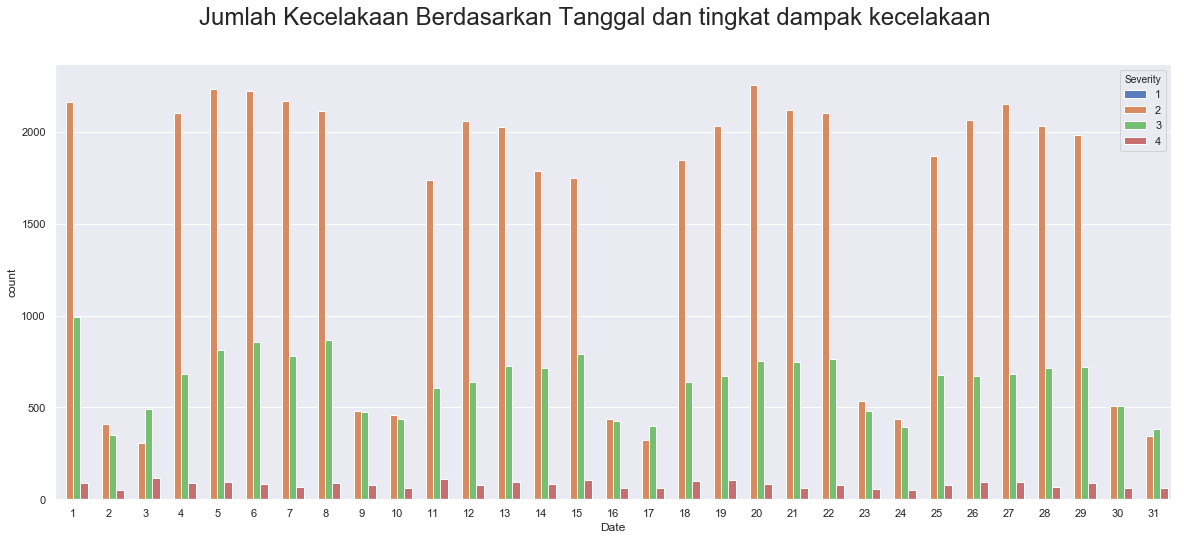

In [40]:
plt.figure(figsize=(20,8))
plt.suptitle('Jumlah Kecelakaan Berdasarkan Tanggal dan tingkat dampak kecelakaan', fontsize=24)
ax = sns.countplot(x = 'Date', hue = 'Severity', palette = 'muted', data=data)

#### Jika dilihat dari dua grafik diatas, data menyebar dan tidak dapat disimpulkan berdasarkan tanggal
### Analisis data tingkat keparahan akibat dampak kecelakaan berdasarakan cuaca

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


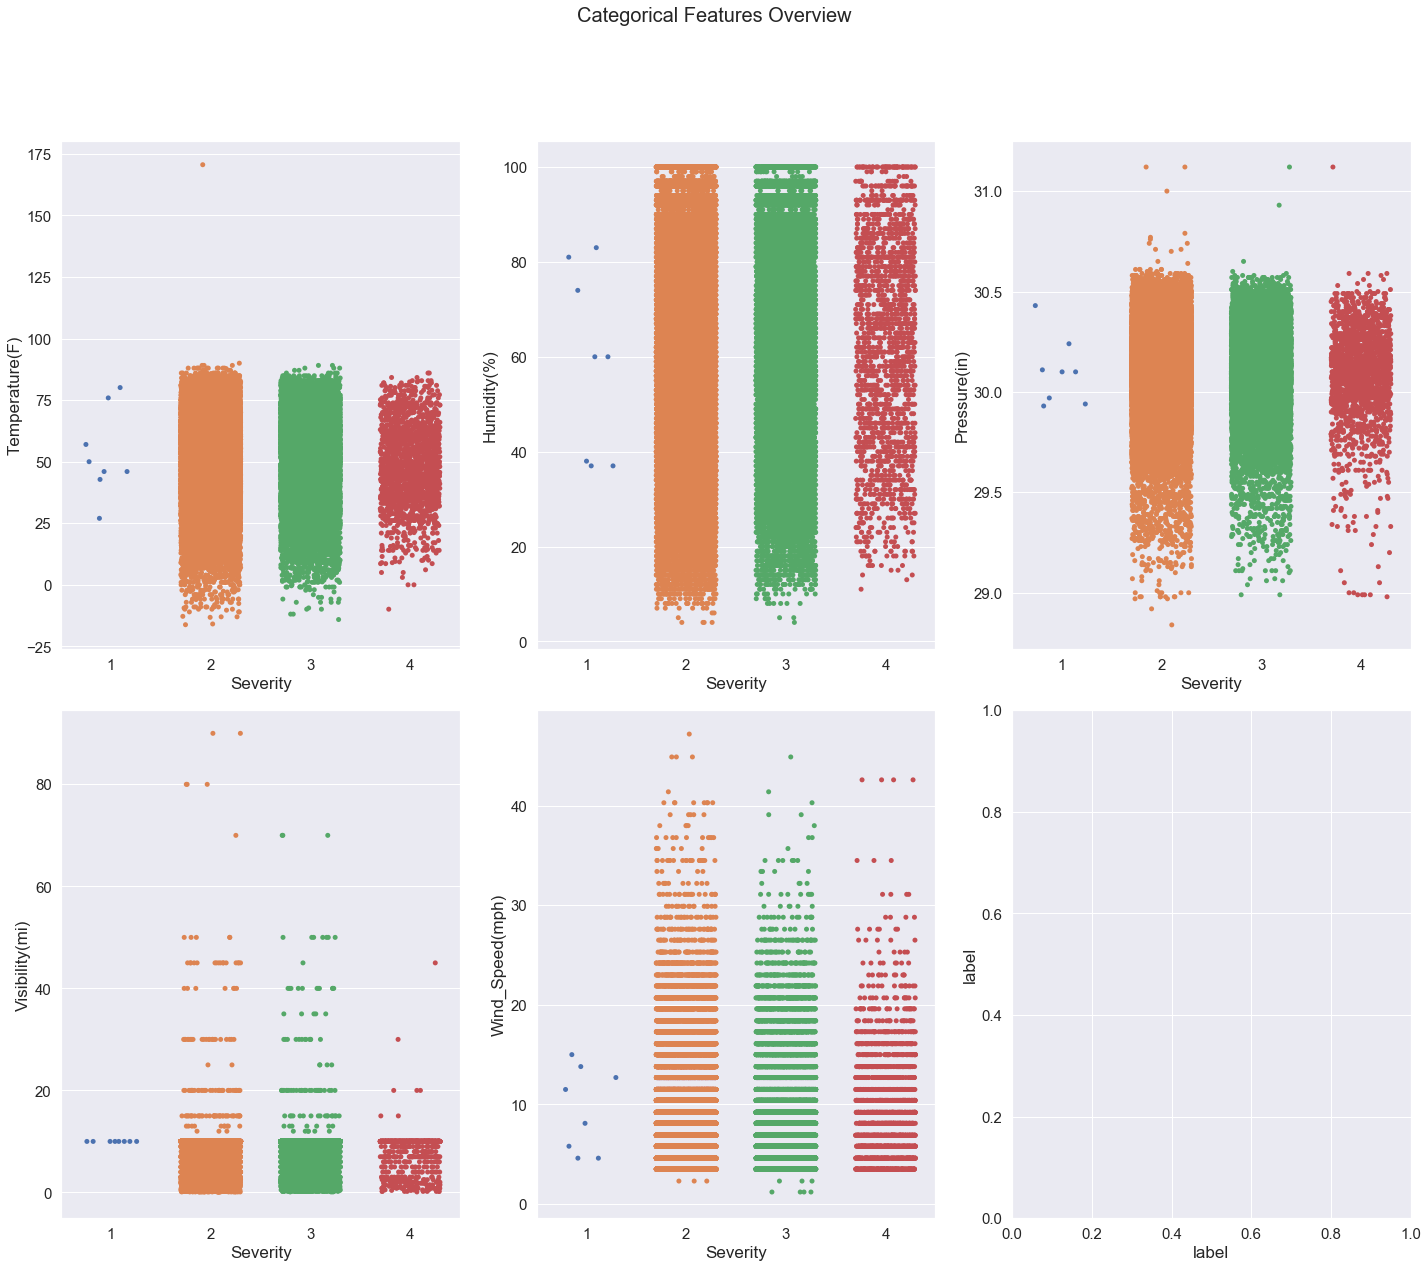

In [79]:
fig, ax = plt.subplots(2,3, figsize=(20,16))
wheater_variables = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                     'Wind_Speed(mph)']
# , 'Weather_Condition', 'Wind_Direction'
k = 0
for j in range(len(ax)):
    for i in range(len(ax[j])):
        ax[j][i].tick_params(labelsize=15)
        ax[j][i].set_xlabel('label', fontsize=17, position=(.5,20))
        ax[j][i].set_ylabel('label', fontsize=17)
        # x as Hindernisabstand hinzufügen
        try:
#             if k > 4:
#                 ax[j][i] = sns.countplot(y = wheater_variables[k], hue = 'Severity', palette = 'muted', data=data_cuaca, ax=ax[j][i])
#             else:
            ax[j][i] = sns.stripplot(x="Severity", y=wheater_variables[k], jitter=0.3, data=data_cuaca, ax=ax[j][i])
            k +=1
        except:
            continue
fig.suptitle('Categorical Features Overview', position=(.5,1.1), fontsize=20)
fig.tight_layout()
fig.show()

Secara visualiasi, nampak pada variable Temperature, Humidity, Pressure, dan Wind_Speed data menyebar secara merata dari min ke max baik dari keparahan tingkat 1 sampai 4. tapi terdapat oulier pada variable Temperature dan Pressure.
Namun sedikit berbeda pada variabel visibility, kebanyakan data tersebar diantara 0 s/d 10 mil. artinya dapat disimpulkan **kecelakaan cenderung terjadi akibat jarak pandang yang semakin pendek**.

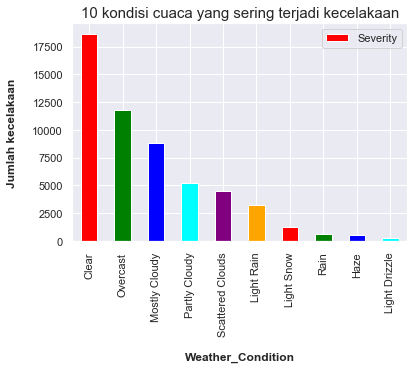

In [45]:
grouped = data_cuaca.groupby(['Weather_Condition']).count().reset_index()
grouped = grouped.sort_values('Severity', ascending=False).head(10)

plot = grouped.plot(kind='bar', x='Weather_Condition', y='Severity', color=color_for_matplotlib)
plot.set_title('10 kondisi cuaca yang sering terjadi kecelakaan', fontsize=15)
plot.set_xlabel('Weather_Condition', weight='bold', labelpad=15)
plot.set_ylabel('Jumlah kecelakaan', weight='bold', labelpad=15)
plot.tick_params(axis='x', pad=5)

In [ ]:
grouped = data_cuaca.groupby(['Weather_Condition']).count().reset_index()
grouped = grouped.sort_values('Severity', ascending=False).head(10)

plot = grouped.plot(kind='bar', x='Weather_Condition', y='Severity', color=color_for_matplotlib)
plot.set_title('10 kondisi cuaca yang sering terjadi kecelakaan', fontsize=15)
plot.set_xlabel('Weather_Condition', weight='bold', labelpad=15)
plot.set_ylabel('Jumlah kecelakaan', weight='bold', labelpad=15)
plot.tick_params(axis='x', pad=5)

In [42]:
data_infrastruktur.describe(include='all')

,Severity,Street,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
count,69381,69381,69381,69381,69381,69381,69381,69381,69381,69381,69381,69381,69381,69381,69381
unique,4,19838,2,2,2,2,2,2,2,2,2,2,2,2,1
top,2,I-5 N,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,47051,807,68607,69376,65588,69241,64616,69304,68807,69373,68410,68644,69365,59349,69381


In [43]:
data_infrastruktur.sample(5)

,Severity,Street,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
32082,3,Coronado Fwy W,0,0,0,0,0,0,0,0,0,0,0,0,0
36879,2,Fidelity St,0,0,0,0,0,0,0,0,0,0,0,1,0
2205,2,County Road 24,0,0,0,0,0,0,0,0,0,0,0,0,0
45222,2,Martin Luther King Jr Memorial Fwy,0,0,0,0,0,0,0,0,0,0,0,0,0
26552,2,Cattlemen Rd,0,0,0,0,0,0,0,0,0,0,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


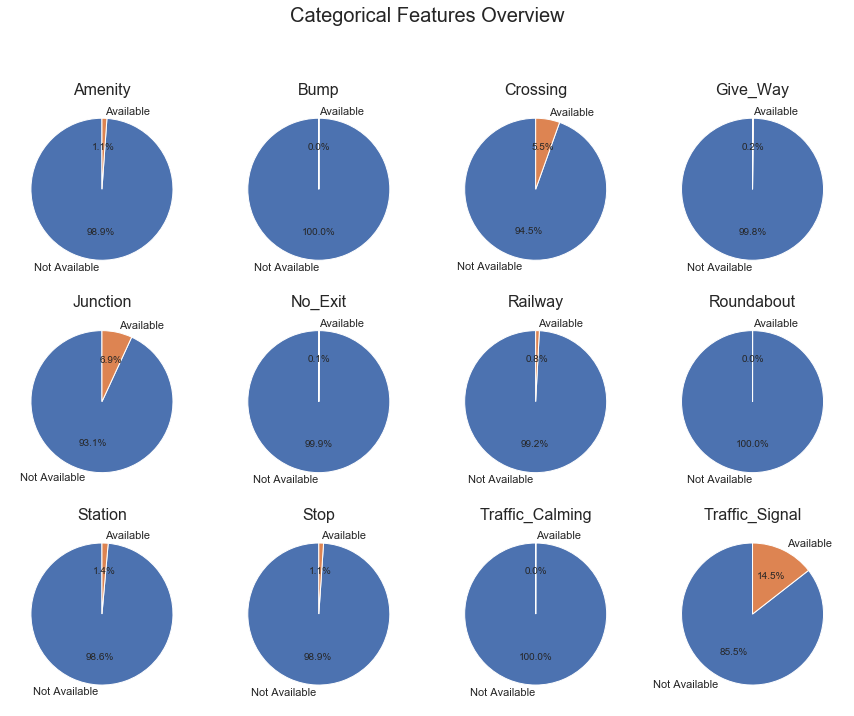

In [44]:
fig, ax = plt.subplots(3,4, figsize=(12,9))
labels = ['Not Available', 'Available']
column = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
          'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
          'Traffic_Calming', 'Traffic_Signal']
i = 0
for row in range(len(ax)):
    for col in range(len(ax[row])):        
        try:
            ax[row][col].set_title(column[i], fontsize=16)
            ax[row][col].pie(data_infrastruktur[column[i]].value_counts(), labels=labels, startangle=90, autopct='%.1f%%')
            i +=1
        except:
            continue

fig.suptitle('Categorical Features Overview', position=(.5,1.1), fontsize=20)
fig.tight_layout()
fig.show()